In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('amazon_sale_data.csv')
data= pd.DataFrame(data= data)
data 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Cape Verde,Household,Online,L,4/7/2018,696059649,4/25/2018,4615,147.77,67.36,681668.55,310826.40,370842.15
1,Europe,Spain,Electronics,Offline,M,8/15/2015,993664919,9/3/2015,289,637.43,304.93,184217.27,88124.77,96092.50
2,Asia,Thailand,Snacks,Online,H,12/3/2013,534285667,12/28/2013,2847,351.67,153.21,1001204.49,436188.87,565015.62
3,North America,Mexico,Beverages,Offline,C,6/18/2017,749969761,7/12/2017,5336,344.87,189.34,1840257.32,1010398.24,829859.08
4,South America,Peru,Cosmetics,Online,L,11/24/2011,477975903,12/18/2011,5728,433.72,307.46,2484407.16,1761920.88,722486.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Middle East and North Africa,Tunisia,Fruits,Online,C,8/8/2019,495837261,9/1/2019,4567,234.78,129.56,1072145.26,591717.52,480427.74
85,Sub-Saharan Africa,Rwanda,Vegetables,Offline,H,3/3/2015,738495162,3/27/2015,7845,345.89,189.34,2713759.05,1485398.30,1228360.75
86,Australia and Oceania,New Zealand,Personal Care,Online,M,9/21/2013,384729516,10/15/2013,2387,456.34,234.78,1089195.58,560378.86,528816.72
87,Europe,Bulgaria,Cosmetics,Offline,L,5/16/2018,516839274,6/9/2018,8934,567.45,298.23,5069178.30,2665002.82,2404175.48


In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Cape Verde,Household,Online,L,4/7/2018,696059649,4/25/2018,4615,147.77,67.36,681668.55,310826.40,370842.15
1,Europe,Spain,Electronics,Offline,M,8/15/2015,993664919,9/3/2015,289,637.43,304.93,184217.27,88124.77,96092.50
2,Asia,Thailand,Snacks,Online,H,12/3/2013,534285667,12/28/2013,2847,351.67,153.21,1001204.49,436188.87,565015.62
3,North America,Mexico,Beverages,Offline,C,6/18/2017,749969761,7/12/2017,5336,344.87,189.34,1840257.32,1010398.24,829859.08
4,South America,Peru,Cosmetics,Online,L,11/24/2011,477975903,12/18/2011,5728,433.72,307.46,2484407.16,1761920.88,722486.28


In [4]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
data.shape

(89, 14)

In [6]:
data.size

1246

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          89 non-null     object 
 1   Country         89 non-null     object 
 2   Item Type       89 non-null     object 
 3   Sales Channel   89 non-null     object 
 4   Order Priority  89 non-null     object 
 5   Order Date      89 non-null     object 
 6   Order ID        89 non-null     int64  
 7   Ship Date       89 non-null     object 
 8   Units Sold      89 non-null     int64  
 9   Unit Price      89 non-null     float64
 10  Unit Cost       89 non-null     float64
 11  Total Revenue   89 non-null     float64
 12  Total Cost      89 non-null     float64
 13  Total Profit    88 non-null     float64
dtypes: float64(5), int64(2), object(7)
memory usage: 9.9+ KB


In [8]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,8.900000e+01,89.000000,89.000000,89.000000,8.900000e+01,8.900000e+01,8.800000e+01
mean,5.777246e+08,5605.348315,404.545393,210.916292,2.235530e+06,1.168331e+06,1.074092e+06
std,1.695871e+08,2393.037078,141.125861,71.837833,1.257609e+06,6.485022e+05,6.413277e+05
min,1.360149e+08,289.000000,103.600000,46.710000,1.842173e+05,8.812477e+04,9.609250e+04
25%,4.790600e+08,3478.000000,298.340000,156.780000,1.090180e+06,5.917175e+05,5.429740e+05
50%,5.647383e+08,5683.000000,387.450000,201.230000,2.116397e+06,1.123379e+06,9.879358e+05
75%,7.194854e+08,7834.000000,489.670000,267.530000,3.241686e+06,1.739004e+06,1.502923e+06
max,9.936649e+08,9623.000000,678.740000,394.300000,5.327930e+06,2.843227e+06,3.351669e+06


In [9]:
data.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      1
dtype: int64

In [10]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [11]:
data = data.astype({'Ship Date': 'datetime64[ns]','Order Date':'datetime64[ns]'})


In [12]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

<Axes: >

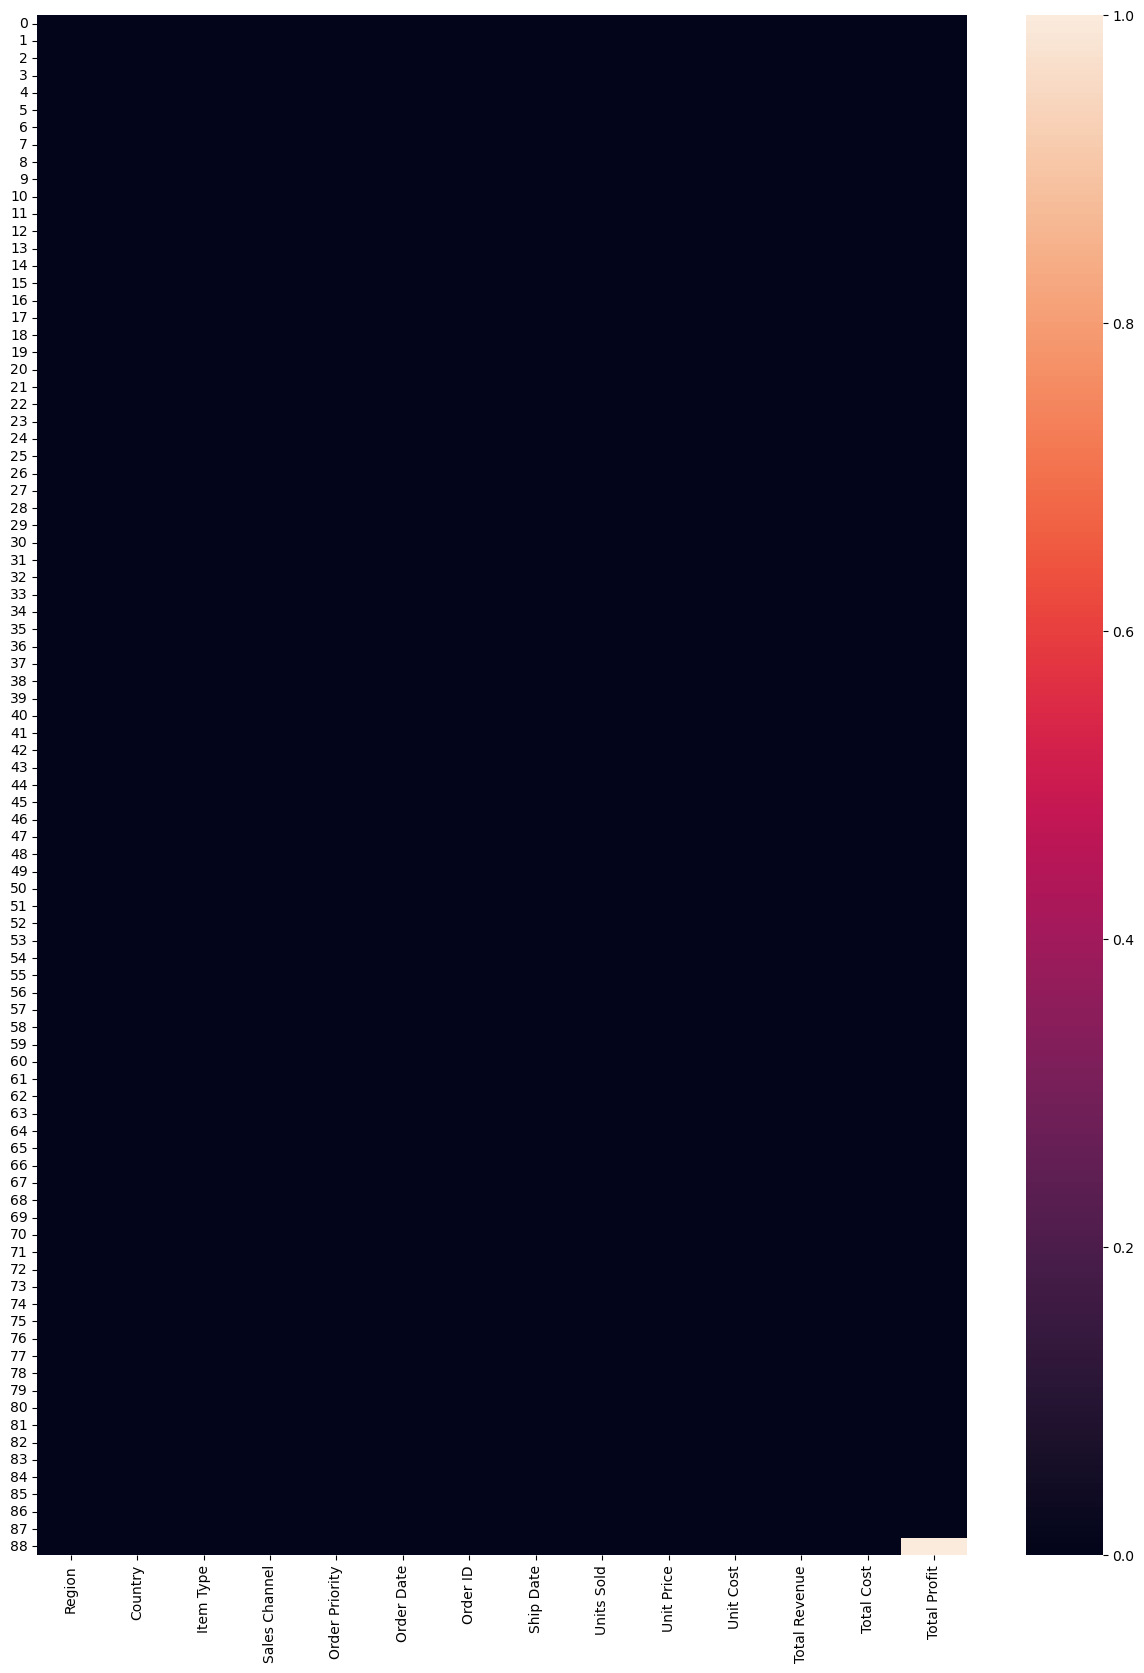

In [13]:
plt.figure(figsize=(15,20))
sns.heatmap(data.isnull()) # NO ANY NULL VALUE PRESENT IN OUR DATASET.

In [14]:
test = data.iloc[0, 12] = np.nan   # ADDING NULL VALUE JUST FOR DEMO
test

nan

<Axes: >

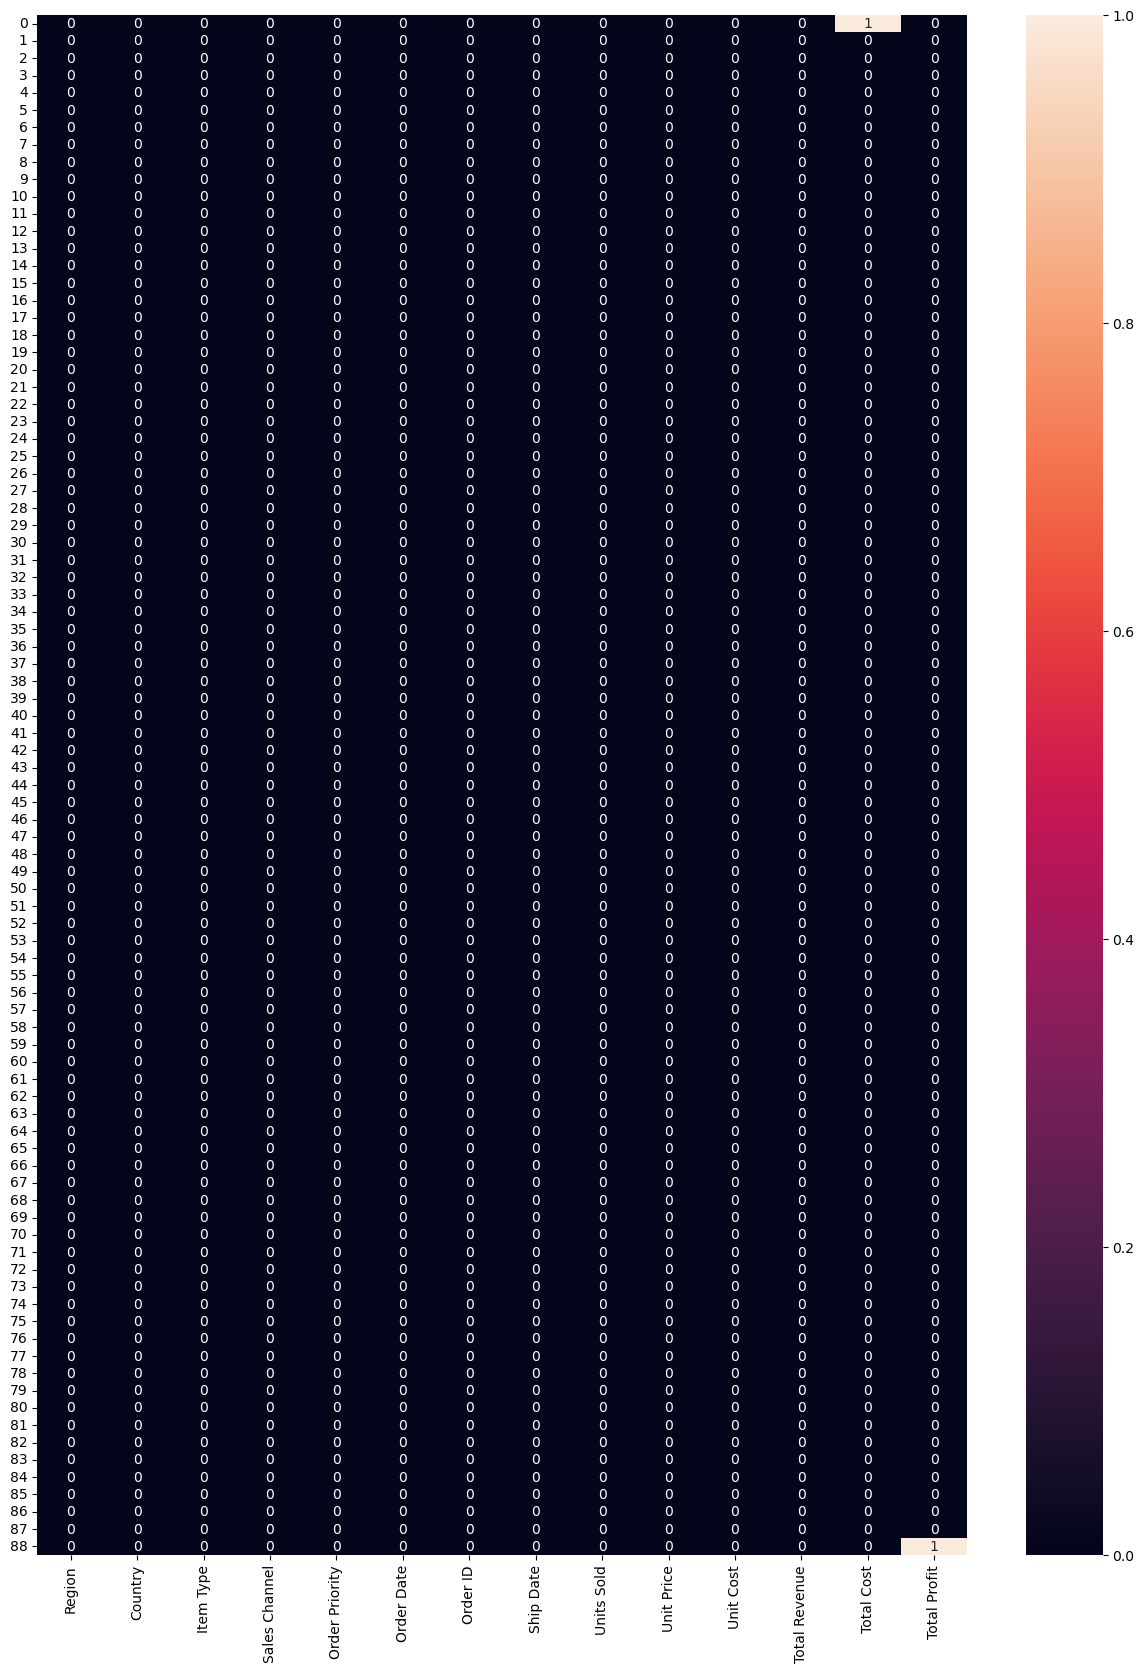

In [15]:
plt.figure(figsize=(15,20))
sns.heatmap(data.isnull(),annot= True) #NULL VALUE FOUND IN 'TOTAL COST' COLUMN

In [16]:
data = data.fillna(data.mean(numeric_only=True))



In [17]:
data['Total Cost']= data['Total Cost'].astype('Float64')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Cape Verde,Household,Online,L,2018-04-07,696059649,2018-04-25,4615,147.77,67.36,681668.55,1178075.744773,3.708422e+05
1,Europe,Spain,Electronics,Offline,M,2015-08-15,993664919,2015-09-03,289,637.43,304.93,184217.27,88124.77,9.609250e+04
2,Asia,Thailand,Snacks,Online,H,2013-12-03,534285667,2013-12-28,2847,351.67,153.21,1001204.49,436188.87,5.650156e+05
3,North America,Mexico,Beverages,Offline,C,2017-06-18,749969761,2017-07-12,5336,344.87,189.34,1840257.32,1010398.24,8.298591e+05
4,South America,Peru,Cosmetics,Online,L,2011-11-24,477975903,2011-12-18,5728,433.72,307.46,2484407.16,1761920.88,7.224863e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Middle East and North Africa,Tunisia,Fruits,Online,C,2019-08-08,495837261,2019-09-01,4567,234.78,129.56,1072145.26,591717.52,4.804277e+05
85,Sub-Saharan Africa,Rwanda,Vegetables,Offline,H,2015-03-03,738495162,2015-03-27,7845,345.89,189.34,2713759.05,1485398.3,1.228361e+06
86,Australia and Oceania,New Zealand,Personal Care,Online,M,2013-09-21,384729516,2013-10-15,2387,456.34,234.78,1089195.58,560378.86,5.288167e+05
87,Europe,Bulgaria,Cosmetics,Offline,L,2018-05-16,516839274,2018-06-09,8934,567.45,298.23,5069178.30,2665002.82,2.404175e+06


<Axes: >

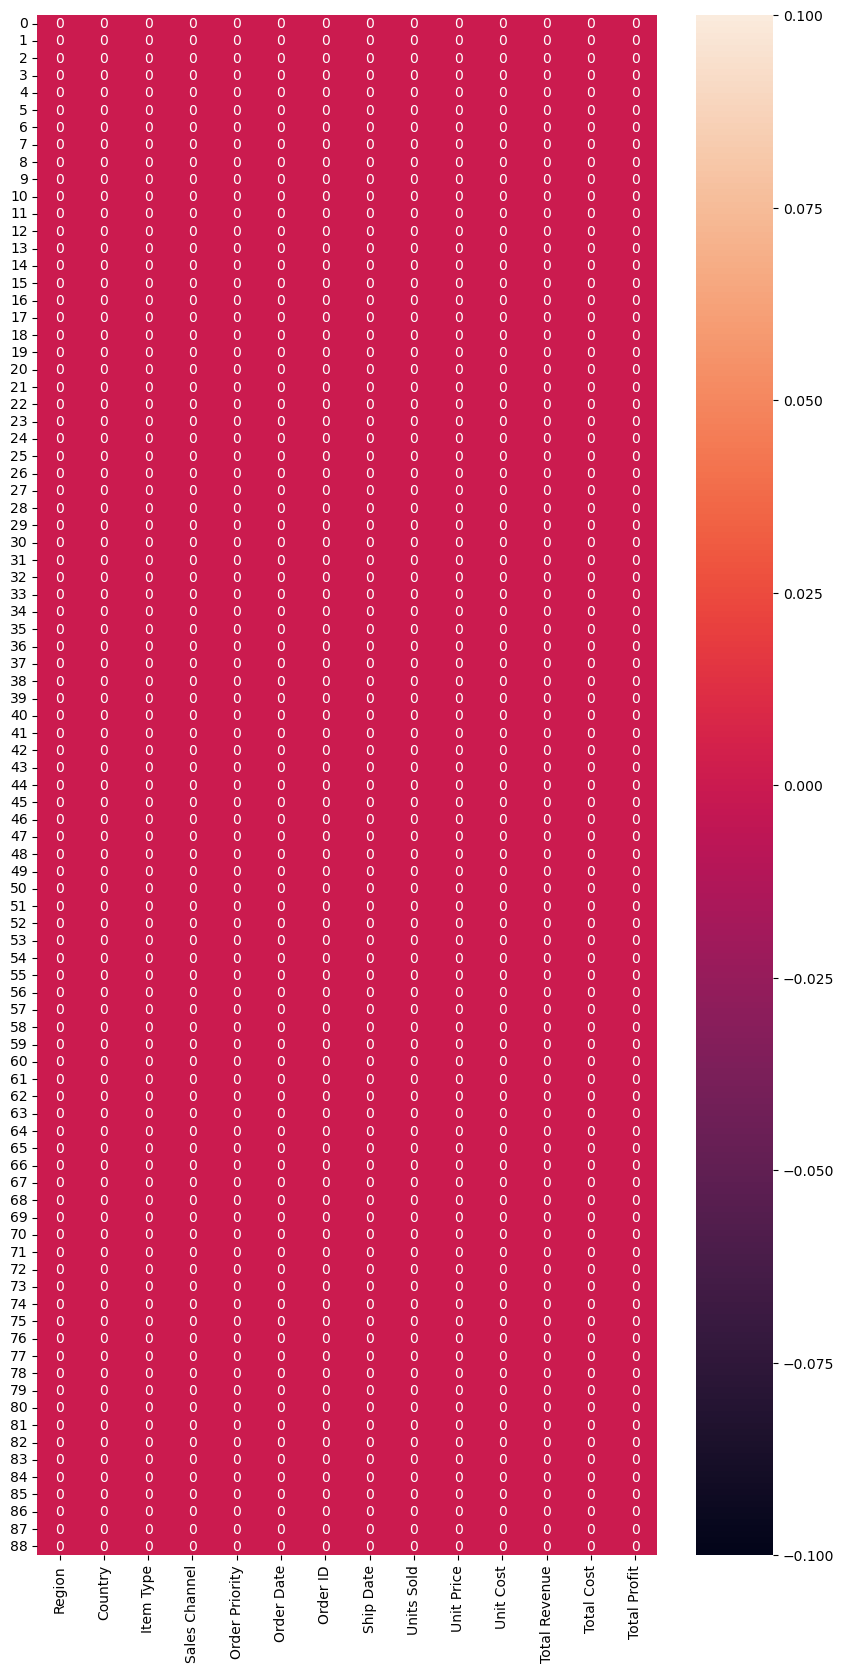

In [18]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True)   # NO NULL VALUES

In [19]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Cape Verde,Household,Online,L,2018-04-07,696059649,2018-04-25,4615,147.77,67.36,681668.55,1178075.744773,370842.15
1,Europe,Spain,Electronics,Offline,M,2015-08-15,993664919,2015-09-03,289,637.43,304.93,184217.27,88124.77,96092.50
2,Asia,Thailand,Snacks,Online,H,2013-12-03,534285667,2013-12-28,2847,351.67,153.21,1001204.49,436188.87,565015.62


Data Analysis:

Queries:

Which regions have the highest total sales revenue?

What is the average unit price and unit cost for each item type?

Which country has the highest total profit?

How does the sales channel affect the order priority distribution?

What is the average order processing time (duration between order and ship dates) for each sales channel?

Which item types have the highest and lowest total sales?

How does the order priority vary across different regions?

What is the correlation between unit price and total profit?

Are there any seasonal trends or patterns in the sales data?

How does the number of units sold vary across different countries?

1- Which regions have the highest total sales revenue?

In [20]:
Highest_Total_Revenue= data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()


'Sub-Saharan Africa'

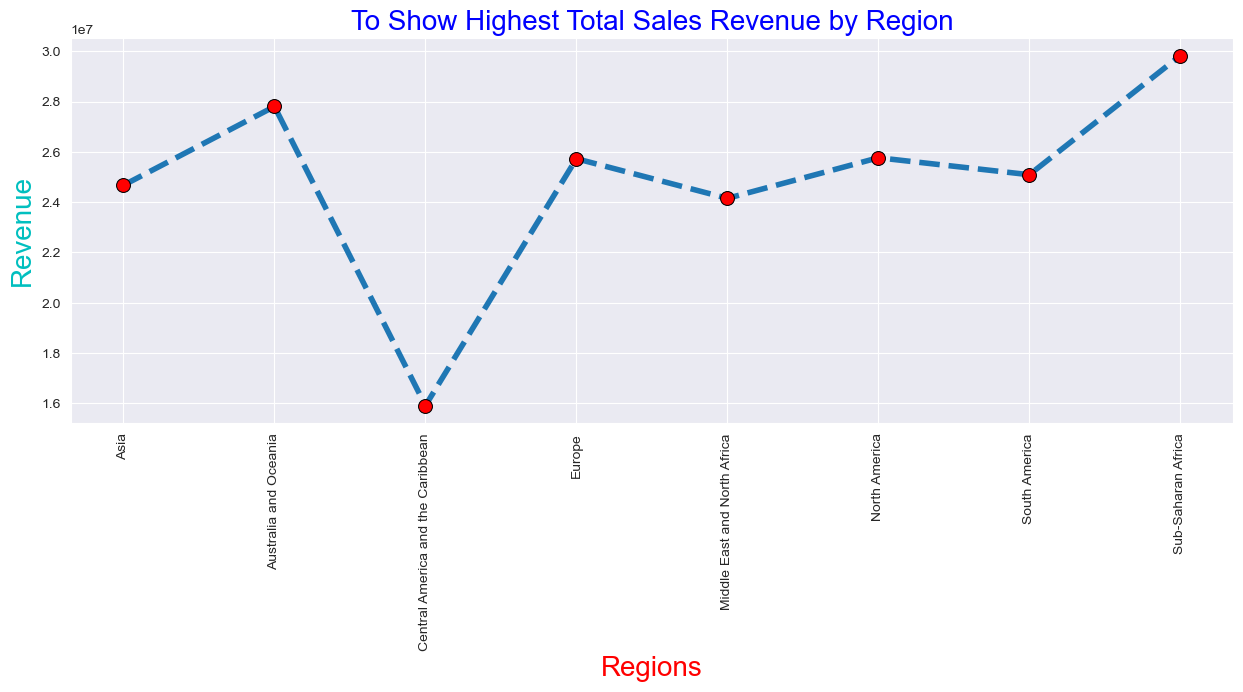

In [21]:

group_data= data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(data= group_data, linestyle= '--' ,linewidth= 4 , marker= 'o', markersize= 10, 
             markerfacecolor='red', markeredgecolor='black')

plt.xticks(rotation= 90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize= 20, color= 'Blue')
plt.xlabel('Regions', fontsize= 20, color= 'red')
plt.ylabel('Revenue', fontsize= 20, color= 'c')
plt.show()


# 1e7 is scientific form. it means 1*10**7= 10,000,000

2- What is the average unit price and unit cost for each item type?

In [22]:
Avg_Unit_Price= data.groupby(data['Item Type'])['Unit Price'].mean()
Avg_Unit_Cost= data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost= pd.DataFrame({'Average Unit Price': Avg_Unit_Price,
                              'Average Unit Cost': Avg_Unit_Cost})

Avg_Price_Cost

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,424.421429,221.288571
Beverages,284.244286,150.717143
Cereal,253.565714,136.050000
Clothes,443.310000,216.643333
Cosmetics,537.030000,286.200000
Electronics,566.085714,293.431429
Fruits,289.188571,144.074286
Household,356.502857,192.045714
Meat,458.066667,248.776667


3- Which country has the highest total profit?

In [23]:
Total_Profit_By_Comapany= data.groupby(data['Country']) ['Total Profit'].sum()
Highest_Total_Profit_County= Total_Profit_By_Comapany.idxmax()

print("Country with the highest total profit:",Highest_Total_Profit_County)

Country with the highest total profit: United States


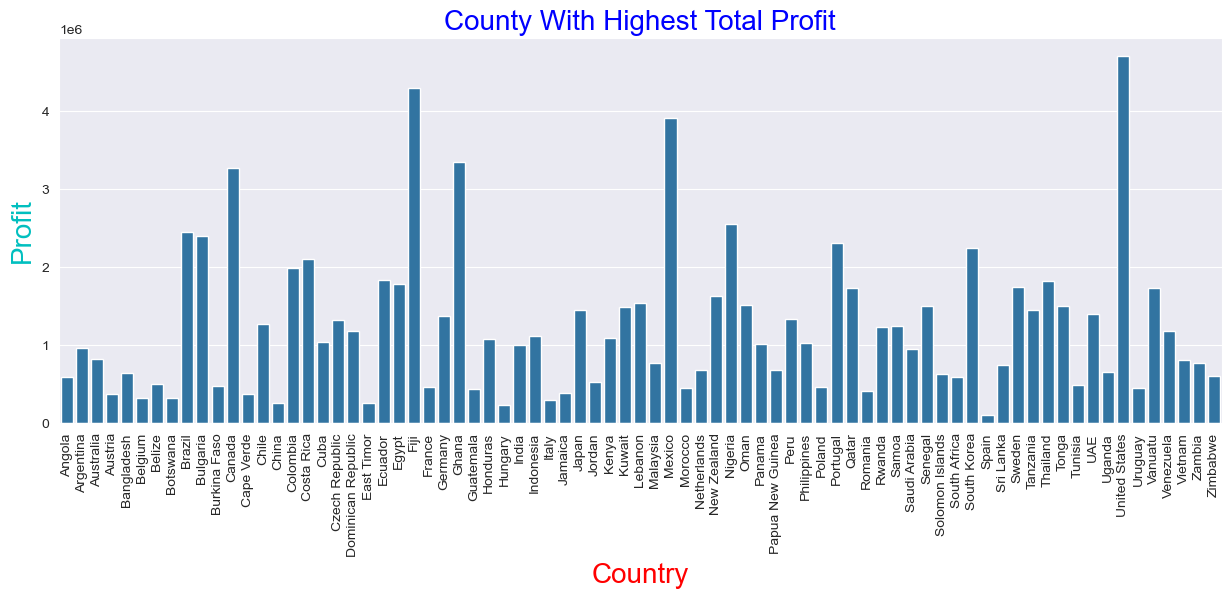

In [24]:
group_data= data.groupby(data['Country']) ['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(x= group_data.index, y= group_data )

plt.xticks(rotation= 90)
plt.title('County With Highest Total Profit', fontsize= 20, color= 'Blue')
plt.xlabel('Country', fontsize= 20, color= 'red')
plt.ylabel('Profit', fontsize= 20, color= 'c')
plt.show()

4- How does the sales channel affect the order priority distribution?

In [25]:
Sales_Channel_Order_Priority_Distribution= data.groupby(data['Sales Channel']) ['Order Priority'].value_counts()
Sales_Channel_Order_Priority_Distribution

Sales Channel  Order Priority
Offline        H                 21
               L                 20
               C                  2
               M                  1
Online         M                 21
               C                 20
               L                  3
               H                  1
Name: count, dtype: int64

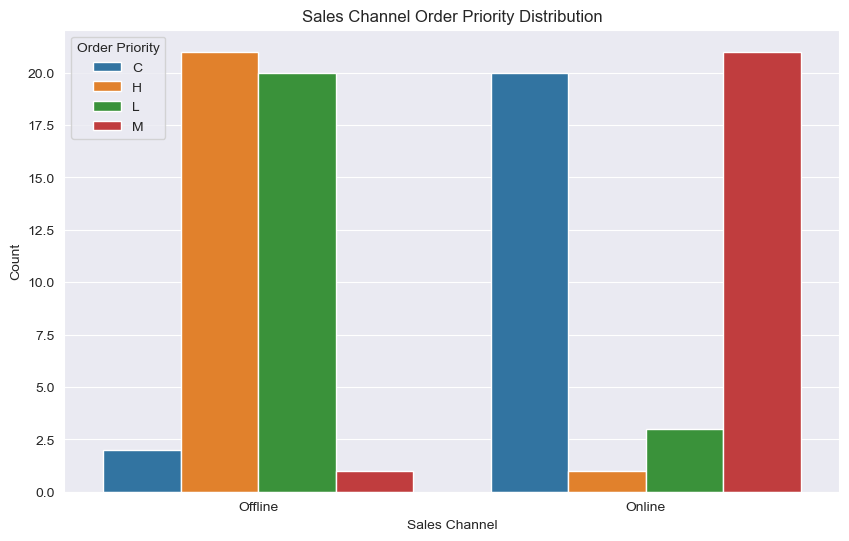

In [26]:


Sales_Channel_Order_Priority_Distribution = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count()

# Reset the index to convert the grouped data into a DataFrame
Sales_Channel_Order_Priority_Distribution = Sales_Channel_Order_Priority_Distribution.reset_index(name='Count')

# Set the style
sns.set_style('darkgrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Count', hue='Order Priority', data=Sales_Channel_Order_Priority_Distribution)

# Add labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Order Priority Distribution')

# Display the plot
plt.show()


5- What is the average order processing time (duration between order and ship dates) for each sales channel?

In [27]:
data['Processing Time']= data['Ship Date']-data['Order Date']

Avg_Processing_Time= data.groupby(data['Sales Channel'])['Processing Time'].mean()
Avg_Processing_Time

Sales Channel
Offline   23 days 22:21:49.090909091
Online              23 days 21:20:00
Name: Processing Time, dtype: timedelta64[ns]

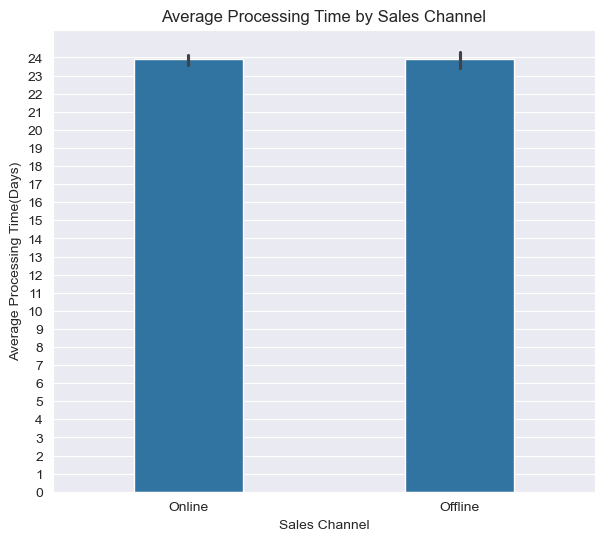

In [28]:
plt.figure(figsize=(7, 6))

sns.barplot(data= data, x= data['Sales Channel'], y=data['Processing Time'].dt.days, width= 0.4 )

plt.title('Average Processing Time by Sales Channel')
plt.xlabel('Sales Channel')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Average Processing Time(Days)')

plt.show()



6- Which item types have the highest and lowest total sales?

In [29]:
group_item_type= data.groupby(data['Item Type'])['Total Revenue'].sum()

highest_sales_revenue_item_type= group_item_type.idxmax()
lowest_sales_revenue_item_type= group_item_type.idxmin()

print("{'Highest Sales Revenue By Item Type':", highest_sales_revenue_item_type, "\n'Lowest Sales Revenue By Item Type':", lowest_sales_revenue_item_type, "}")

{'Highest Sales Revenue By Item Type': Baby Food 
'Lowest Sales Revenue By Item Type': Snacks }


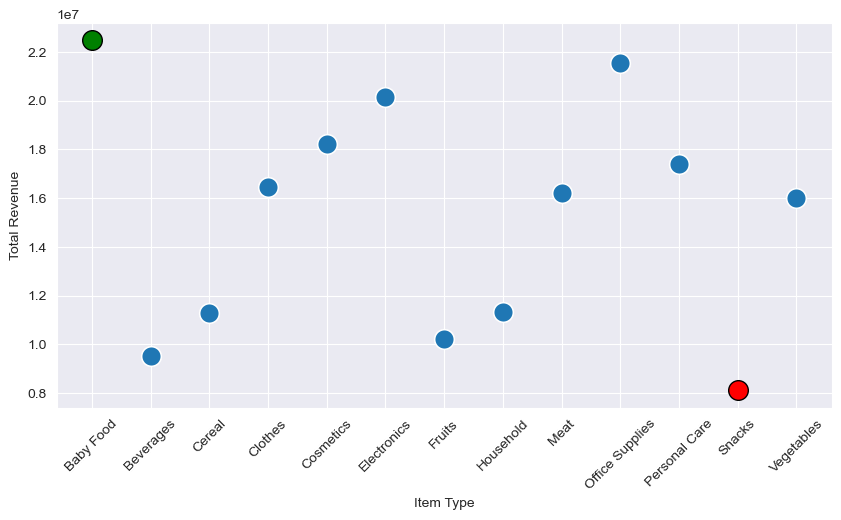

In [30]:
plt.figure(figsize=(10,5))

# Highlight Max Value
sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200)
max_index = group_item_type.idxmax()
plt.scatter(x=max_index, y=group_item_type[max_index], s=200, color='Green', edgecolor='black')

# Highlight the minimum value
min_index = group_item_type.idxmin()
plt.scatter(x=min_index, y=group_item_type[min_index], s=200, color='RED', edgecolor='black')

plt.yticks(rotation= 0)
plt.xticks(rotation= 45)
plt.show()

7- How does the order priority vary across different regions?

In [31]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts()
Diff_regions_by_order_priority

Region                             Order Priority
Asia                               M                 5
                                   H                 4
                                   L                 3
                                   C                 1
Australia and Oceania              C                 3
                                   H                 3
                                   L                 3
                                   M                 2
Central America and the Caribbean  C                 5
                                   L                 2
                                   M                 1
Europe                             M                 6
                                   C                 3
                                   H                 3
                                   L                 2
Middle East and North Africa       H                 3
                                   M                 3
               

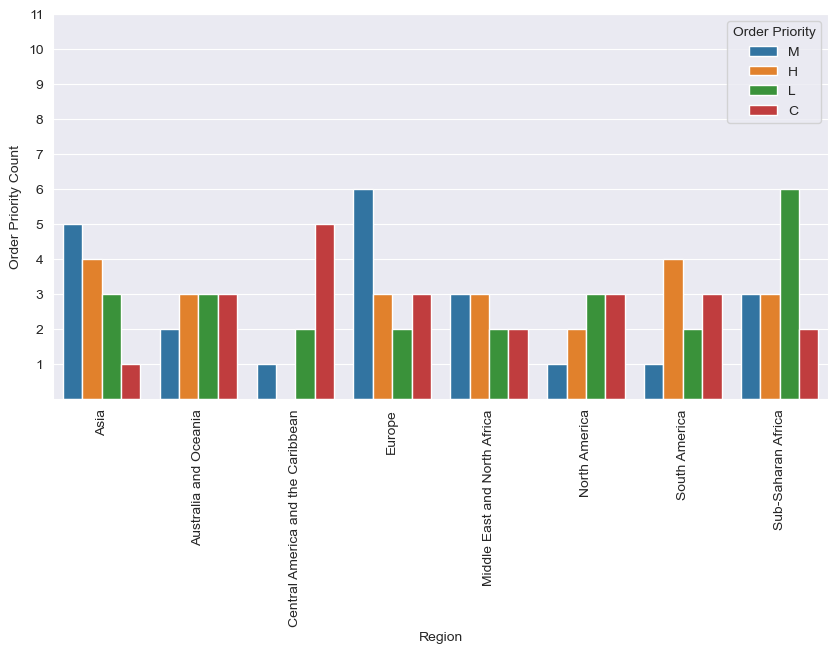

In [32]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts().reset_index(name='Order Priority Count')
plt.figure(figsize= (10,5))
sns.barplot(data= Diff_regions_by_order_priority, x= 'Region', y= 'Order Priority Count', hue= 'Order Priority')
plt.xticks(rotation= 90)
plt.yticks(np.arange(1,12,1))

plt.show()

8- What is the correlation between unit price and total profit?

In [33]:
Correlation_Unit_Price_Total_Profit= data['Unit Price'].corr(data['Total Profit'])

print("Correlation between Unit Price and Total Profit:", Correlation_Unit_Price_Total_Profit)


Correlation between Unit Price and Total Profit: 0.5409140272447697


<function matplotlib.pyplot.show(close=None, block=None)>

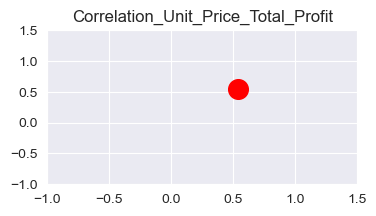

In [34]:
plt.figure(figsize=(4,2))
plt.scatter(x= Correlation_Unit_Price_Total_Profit, y= Correlation_Unit_Price_Total_Profit, s= 200, color= 'RED' )
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.title('Correlation_Unit_Price_Total_Profit')

plt.show

9- Are there any seasonal trends or patterns in the sales data?

In [35]:
month_names= {1: 'JAN',
              2: 'FEB',
              3: 'MAR',
              4: 'APR',
              5: 'MAY',
              6: 'JUN',
              7: 'JUL',
              8: 'AUG',
              9: 'SEPT',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = data.groupby(data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales


Order Date
JAN     15495440.63
FEB     16260064.75
MAR     24464669.08
APR     15380117.00
MAY     15722678.08
JUN     14542452.79
JUL     16033551.46
AUG     17221806.35
SEPT    14722595.06
OCT     15158669.11
NOV     16562881.67
DEC     17397251.15
Name: Total Revenue, dtype: float64

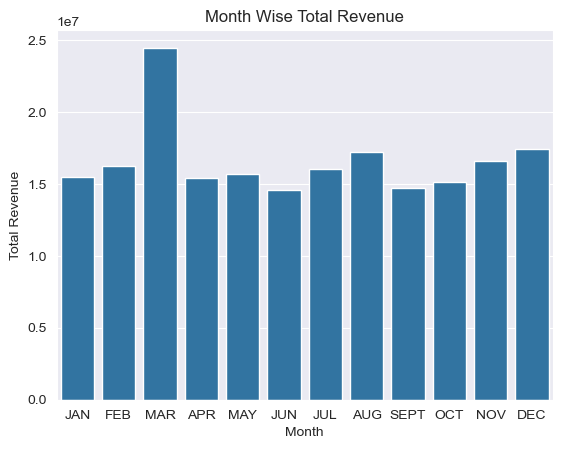

In [36]:

sns.barplot(x= monthly_sales.index, y= monthly_sales)
plt.title('Month Wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


10- How does the number of units sold vary across different countries?

In [37]:
Diff_countries_by_unit_sold= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')
pd.set_option('display.max_rows',None)
Diff_countries_by_unit_sold

,Country,Unit Sold
0,Angola,3294
1,Argentina,4567
2,Australia,2156
3,Austria,2394
4,Bangladesh,2387
5,Belgium,3479
6,Belize,4728
7,Botswana,2394
8,Brazil,11879
9,Bulgaria,8934


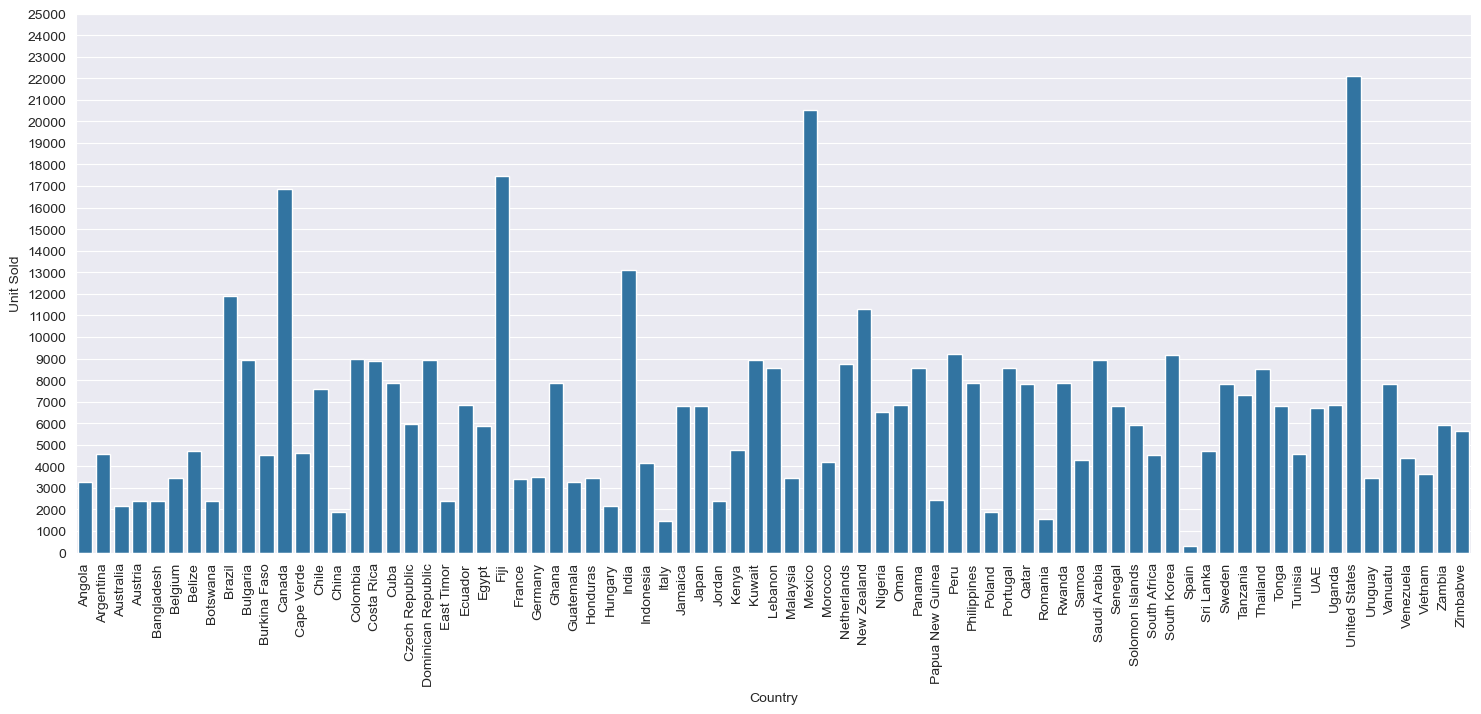

In [38]:
plt.figure(figsize= (18,7))
sns.barplot( data= Diff_countries_by_unit_sold, x= 'Country', y= 'Unit Sold')
plt.xticks(rotation= 90)
plt.yticks(np.arange(0,26000,1000))
plt.show()

Other Queries:

How does the total sales revenue vary across different countries? 

What is the distribution of unit prices for each item type? 

Which sales channel has the highest average unit price?

Are there any outliers in the total cost distribution?

How does the total profit vary across different item types?

What is the average order processing time for each country?

Which region has the highest average total revenue per order?

Is there a relationship between the number of units sold and the total profit?

How does the order priority vary based on the item type?

Are there any trends or patterns in the order dates?

11- How does the total sales revenue vary across different countries? 

In [39]:
sales_revenue_by_countries=  data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')
sales_revenue_by_countries

,Country,Total Revenue
0,Angola,1247370.98
1,Argentina,2083797.44
2,Australia,1461626.72
3,Austria,828460.66
4,Bangladesh,1353317.01
5,Belgium,659037.55
6,Belize,1110612.72
7,Botswana,693401.98
8,Brazil,4904558.43
9,Bulgaria,5069178.30


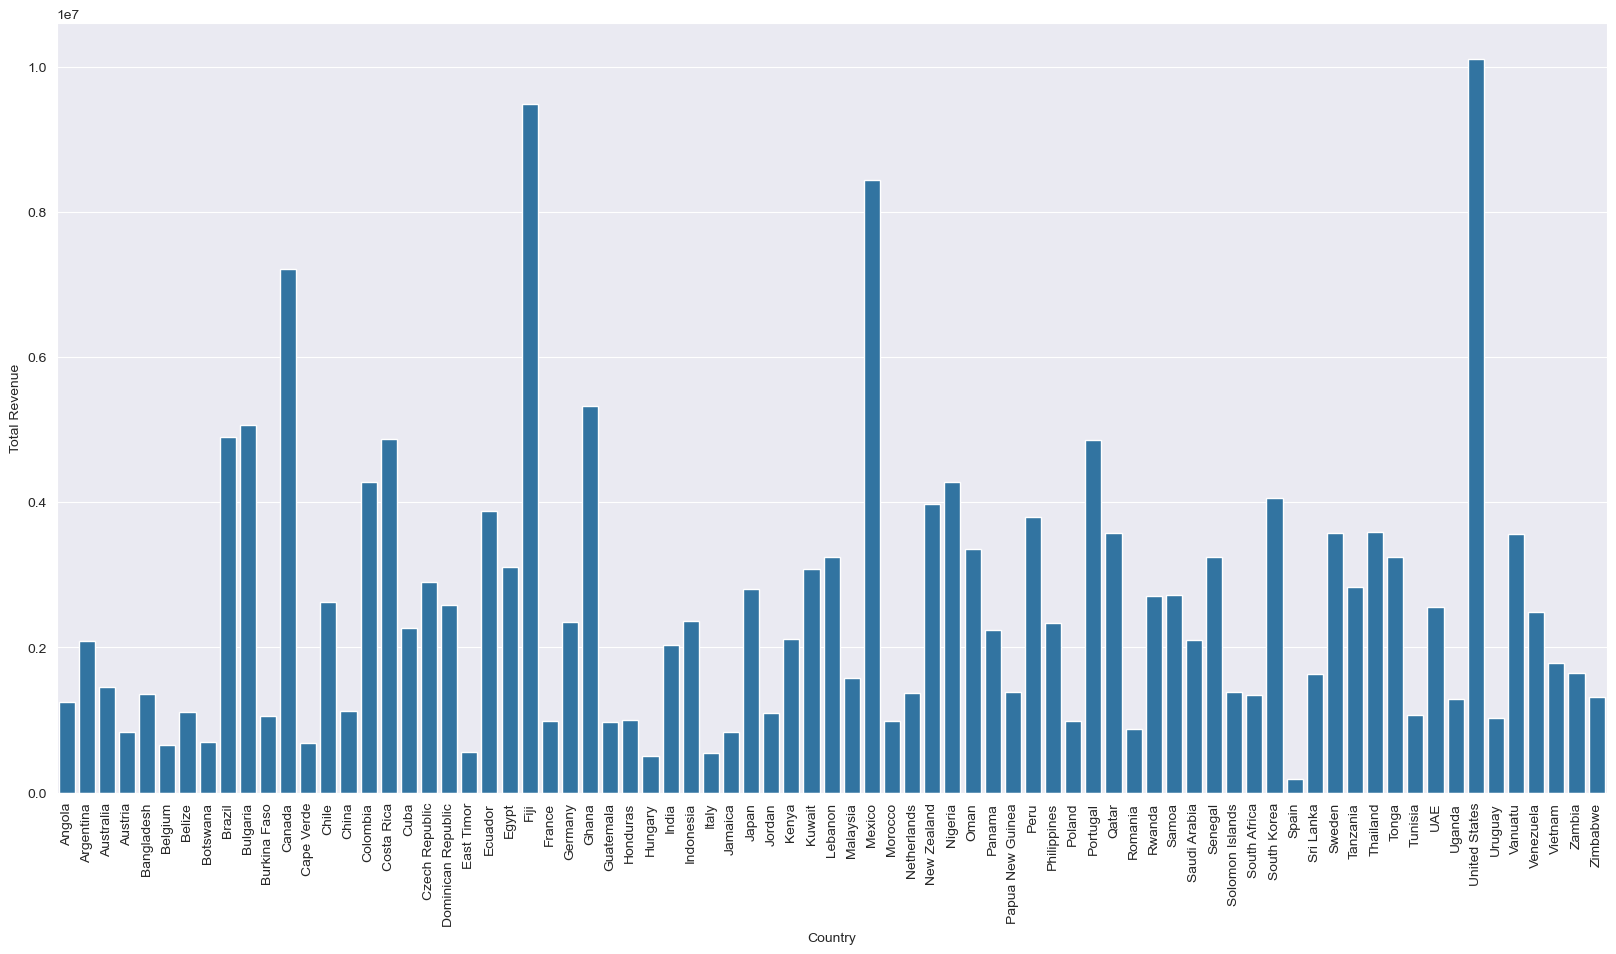

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x= sales_revenue_by_countries['Country'], y= sales_revenue_by_countries['Total Revenue'])
plt.xticks(rotation= 90)
plt.show()

12- What is the distribution of unit prices for each item type?

In [41]:
unit_price_and_item_type_distribution= data.groupby(data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
unit_price_and_item_type_distribution

,Item Type,Unit Price
0,Baby Food,2970.95
1,Beverages,1989.71
2,Cereal,1774.96
3,Clothes,2659.86
4,Cosmetics,3759.21
5,Electronics,3962.60
6,Fruits,2024.32
7,Household,2495.52
8,Meat,2748.40
9,Office Supplies,3605.59


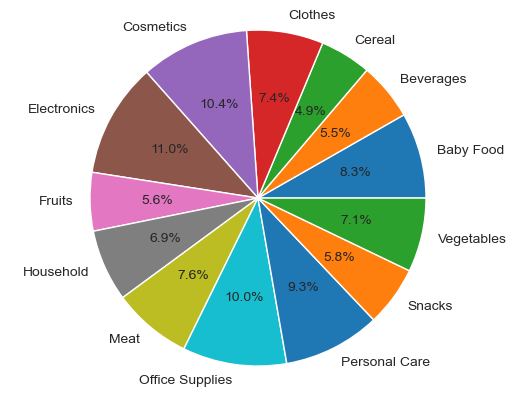

In [42]:
plt.pie(x= unit_price_and_item_type_distribution['Unit Price'], labels= unit_price_and_item_type_distribution['Item Type'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

13- Which sales channel has the highest average unit price?

In [43]:
Highest_avg_unit_price_for_sales_channel= data.groupby(data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'new')
Highest_avg_unit_price_for_sales_channel



,Sales Channel,new
0,Offline,415.547727
1,Online,393.787556


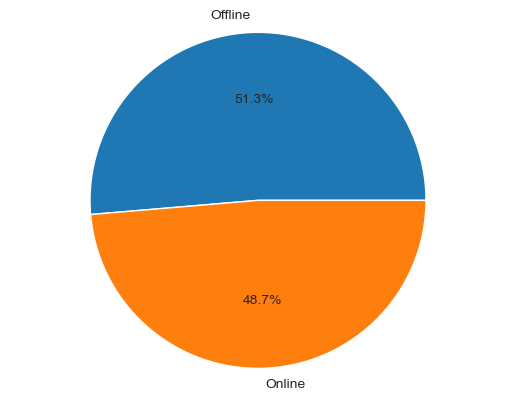

In [44]:
plt.pie(x= Highest_avg_unit_price_for_sales_channel['new'],labels=Highest_avg_unit_price_for_sales_channel['Sales Channel'], autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

14- Are there any outliers in the total cost distribution?

In [45]:


q1= data['Total Cost'].quantile(0.25)
q3= data['Total Cost'].quantile(0.75)

iqr= q3-q1

lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

outliers= data[(data['Total Cost']<lower_fence)| (data['Total Cost']>upper_fence)].reset_index(drop= True)
outliers



,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time


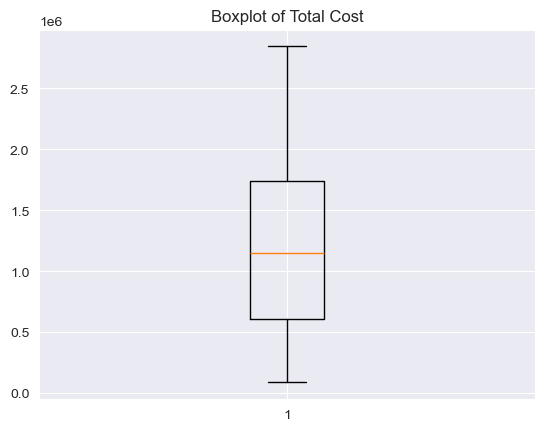

In [46]:

plt.boxplot(data['Total Cost'])
plt.title('Boxplot of Total Cost')
plt.show()


15- How does the total profit vary across different item types?

In [47]:
total_profit_and_diff_item_types= data.groupby(data['Item Type'])['Total Profit'].sum().reset_index(name='Total Profit')
total_profit_and_diff_item_types

,Item Type,Total Profit
0,Baby Food,1.074945e+07
1,Beverages,4.520469e+06
2,Cereal,5.871281e+06
3,Clothes,8.626119e+06
4,Cosmetics,8.306115e+06
5,Electronics,9.469992e+06
6,Fruits,5.196487e+06
7,Household,5.200714e+06
8,Meat,7.320086e+06
9,Office Supplies,9.615931e+06


16- What is the average order processing time for each country?

In [48]:
Avg_Processing_Time_by_country= data.groupby(data['Country'])['Processing Time'].mean()
Avg_Processing_Time_by_country

Country
Angola               24 days 00:00:00
Argentina            24 days 00:00:00
Australia            25 days 00:00:00
Austria              24 days 00:00:00
Bangladesh           24 days 00:00:00
Belgium              24 days 00:00:00
Belize               24 days 00:00:00
Botswana             24 days 00:00:00
Brazil               24 days 12:00:00
Bulgaria             24 days 00:00:00
Burkina Faso         24 days 00:00:00
Canada               23 days 16:00:00
Cape Verde           18 days 00:00:00
Chile                24 days 00:00:00
China                25 days 00:00:00
Colombia             24 days 00:00:00
Costa Rica           25 days 00:00:00
Cuba                 24 days 00:00:00
Czech Republic       24 days 00:00:00
Dominican Republic   24 days 00:00:00
East Timor           24 days 00:00:00
Ecuador              24 days 00:00:00
Egypt                23 days 00:00:00
Fiji                 20 days 12:00:00
France               23 days 00:00:00
Germany              28 days 00:00:00
Ghan

17- Which region has the highest average total revenue per order?

In [49]:
data['avg total revenue']= data['Total Revenue']/data['Units Sold']
highest_avg_total_revenue_per_order= data.groupby(data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)
highest_avg_total_revenue_per_order.head(1)



Region
Asia    414.72461
Name: avg total revenue, dtype: float64

19- Is there a relationship between the number of units sold and the total profit?

In [50]:
Correlation_unit_sold_and_total_profit= data['Units Sold'].corr(data['Total Profit'])
print(f"Correlation coefficient: {Correlation_unit_sold_and_total_profit}")


Correlation coefficient: 0.6937287357091692


20- How does the order priority vary based on the item type?

In [51]:
Order_priority_vary_on_item_type= data.groupby(data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')
Order_priority_vary_on_item_type

,Order Priority,Item Type,No. Of Items
0,C,Baby Food,3
1,C,Beverages,2
2,C,Cereal,2
3,C,Clothes,2
4,C,Fruits,2
5,C,Household,2
6,C,Meat,2
7,C,Vegetables,2
8,C,Cosmetics,1
9,C,Electronics,1
